# Démonstration de code pour le projet Image

Dans cette démo, nous allons voir comment manipuler une image à travers différentes bibliothèques.

Parmi ces bibliothèques, on retrouve donc **Matplotlib**, **Numpy**, **Pillow** et **Scikit-image**.

# Importations

In [122]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import patches
import numpy as np
from PIL import Image
from PIL import ImageFilter
from PIL import ImageFont, ImageDraw, ImageEnhance
from skimage import io
from skimage import data
from skimage.feature import Cascade
import sys

# Création d'image avec Numpy

Les images sont en réalité des valeurs qui sont stockées dans des tableaux. Si on peut manipuler des tableaux en programmation, on peut alors aussi bien manipuler des images.
Et une bibliothèque qui est très utilisé dans la manipulation de tableau est Numpy.


Nous allons, pour commencer, créer une image pixel par pixel pour comprendre comment fonctionne le codage des images.

In [123]:
# Dimensions de l'image en pixel
largeur = 15
hauteur = 9

On choisit ici des dimensions pour notre images. Ici, on a choisit une largeur de 15 pixels, et une hauteur de 9 pixels.


Comment est codée une image ?

Voici un schéma qui résume le concept d'image :

![](schema2.png) Source : https://www.pythoninformer.com/python-libraries/numpy/numpy-and-images/

On voit donc que pour notre cas, chaque lignes est composées de 15 pixels, qui sont eux-mêmes composés de 3 bytes, donc 3 dimensions par pixels.

Avec Numpy, nous pouvons recréer de toute pièce ce système grâce à l'utilisation de tableaux. Nous allons donc initialiser un tableau Numpy avec ces dimensions et avec 3 canaux pour les 3 dimensions d'un pixel **Rouge**, **Vert** et **Bleu**.

Pour cela, on utilise la fonction **zeros** de Numpy pour initialiser un tableau remplit de 0 qui a les dimensions de l'image qu'on souhaite créer.

In [124]:
# 3 canaux pour RVB, creation d'un tableau de 0 avec des uint8
image_france = np.zeros([hauteur,largeur,3], dtype = np.uint8)

On indique donc la hauteur, largeur et enfin la dimension d'une case, donc d'un pixel qui est ici de 3. On indique également que les valeurs de ces tableaux sont des *uint8*, type d'entier qui vient du module Numpy.

Ce type d'entier est adéquat pour les images, car chaque canaux a une valeur entre 0 et 255, tout comme les entiers de types *uint8*.

On peut afficher quelques caractèristiques de ce tableau numpy :

In [125]:
print(type(image_france))

<class 'numpy.ndarray'>


Le type de ce tableau est **numpy.ndarray**, ce qui signifie que c'est un tableau multidimensionnel de Numpy.

On peut regarder les dimensions de ce tableau :

In [126]:
print(image_france.shape)

(9, 15, 3)


9 lignes, 15 colonnes et 3 canaux pour chaque pixels ce qui correspond bien à ce que l'on veut.


Maintenant, si on veut l'afficher :

In [127]:
print(image_france[:3])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


On affiche seulement les 3 premières lignes du tableau.

On constate qu'il y a un tableau pour chaqu'une des 3 lignes affichées (la hauteur de l'image), dans ce tableau, nous avons 15 tableaux qui correspondent aux 15 colonnes de notre image (la largeur), et dans chacuns des 15 tableaux, nous avons un dernier tableau qui correspond au pixel avec 3 dimensions qui ici contient 3 zéros.

Et, le tableau principal qui contient tous ces tableaux est l'image elle-même.

Si on affiche notre image actuelle :

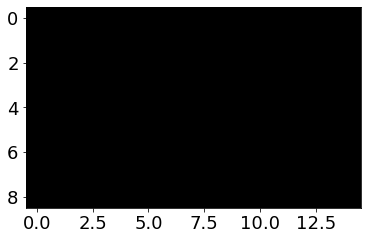

In [128]:
plt.imshow(image_france)

On a une image noire, ce qui est normal car notre image contient uniquement des 0, on a donc une absence de couleur, donc du noir.

## Construction de l'image


Maintenant qu'on sait comment est codée une image, on va modifier ces valeurs pour former des couleurs et donc une image.

Prenons comme exemple le drapeau de la France. Les couleurs sont donc **Bleu**, **Blanc** et **Rouge**. Pour coder ces couleurs, il faut connaitre leur composition en couleurs primaires, c'est à dire Rouge Vert Bleu.

Le Rouge est codé de cette manière : [255,0,0], nous avons une valeur maximal pour le rouge, et minimale pour le Vert et Bleu, ce qui est logique car on veut du Rouge.

Pour le Blanc, on sait que ce dernier est un mélange de toutes les couleurs, donc : [255,255,255].

Enfin, pour le Bleu, comme pour le Rouge, on séléctionne uniquement le Bleu dans les canaux : [0,0,255]

In [129]:
bleu = [0,0,255]
blanc = [255,255,255]
rouge = [255,0,0]

On va maintenant modifier les valeurs de notre tableau *image_france*. 

Pour chaque ligne du tableau, nous allons mettre à la fois du Bleu, Blanc et du Rouge, mais à différent endroits.

Les 5 premiers pixels seront du Bleu, les 5 suivant du Blanc, et les 5 derniers du Rouge.

In [130]:
for ligne in range(hauteur):
    image_france[ligne][0:5] = bleu
    image_france[ligne][5:10] = blanc
    image_france[ligne][10:] = rouge

On affiche l'image qu'on vient de créer en utilisation la fonction *imshow* de **Matplotlib** :

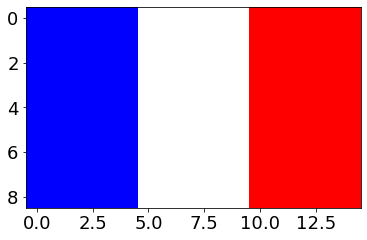

In [131]:
plt.imshow(image_france)

Nous avons réussi à créer l'image de la France pixel par pixel en modifiant les valeurs d'un tableau Numpy.

# Manipulation d'image avec Numpy et Matplotlib

## Ouverture d'une image en niveau de gris

Désormais, on sait comment est composée une image . On va maintenant voir quelques opérations sur les images telles que le rognage, passage en niveau de gris...


On commence par ouvrir une image avec la fonction *imread* de **Matplotlib**.

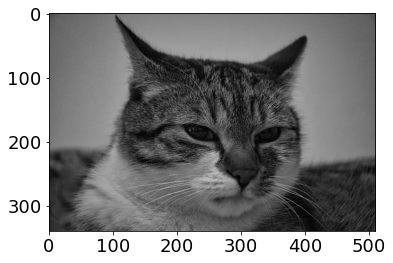

In [132]:
gray_cat = mpimg.imread("img/cat.jpg")
plt.imshow(gray_cat)

Nous avons ici ouvert une image en niveau de gris mais on peut aussi transormer une image couleur en image en niveau de gris grâce à Numpy et les manipulations des tableaux Numpy.

## Passage d'une image couleur en image en niveau de gris

Essayons avec une image en couleur, on ouvre cette image avec Matplotlib :

In [133]:
img = mpimg.imread("img/gorille.jpg")

Comme précédemment, on peut afficher le contenu de cette image et le type :

In [134]:
print(type(img))
print(img)

<class 'numpy.ndarray'>
[[[ 20  20  30]
  [ 20  20  30]
  [ 19  19  29]
  ...
  [ 42  44  39]
  [ 43  45  40]
  [ 44  46  41]]

 [[ 19  19  29]
  [ 20  20  30]
  [ 19  19  29]
  ...
  [ 40  42  37]
  [ 39  41  36]
  [ 40  42  37]]

 [[ 18  18  28]
  [ 19  19  29]
  [ 19  19  29]
  ...
  [ 39  41  36]
  [ 37  39  34]
  [ 37  39  34]]

 ...

 [[ 68 129  51]
  [ 67 130  51]
  [ 68 131  52]
  ...
  [218 242  42]
  [217 241  41]
  [216 240  40]]

 [[ 68 129  51]
  [ 68 129  51]
  [ 68 131  52]
  ...
  [219 242  46]
  [219 242  46]
  [218 241  45]]

 [[ 68 129  52]
  [ 68 129  52]
  [ 69 130  52]
  ...
  [221 244  48]
  [221 244  48]
  [220 243  47]]]


On retrouve le type **numpy.ndarray** qui signifie que ce tableau Numpy est multidimensionnel.

La structure des tableaux est également similaire à notre drapeau de la France. On retrouve des lignes, des colonnes, et des pixels à trois dimensions.

On affiche les dimensions de cette image, on utilise toujours shape, car **img** est un objet Numpy :


In [135]:
print(img.shape)

(523, 1060, 3)


Dans cette image, on a donc 523 lignes composées de 1060 pixels chacunes, et chaque pixel a 3 dimensions pour les 3 couleurs Rouge Vert Bleu.


Passons maintenant à l'affichage de cette image, on procède de la même manière que pour le drapeau, on utilise la fonction imshow de Matplotlib :

Image d'origine, en couleur : 



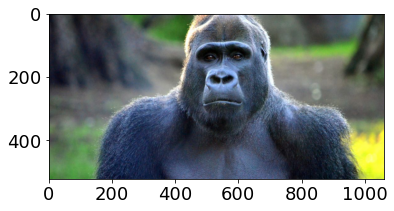

In [136]:
print("Image d'origine, en couleur : \n")
plt.imshow(img)

On veut donc passer d'une image en couleur en une image en niveau de gris. Les images en niveau de gris sont codées différemment que les images en couleurs. Ces dernières ont des pixels codés sur 3 bytes, donc 3 dimensions pour les 3 couleurs Rouge Vert Bleu. Les pixels d'une image en niveau de gris n'ont qu'une seule dimension, la luminance de l'image qui correspond au niveau de gris.

Pour un vrai passage de image en couleur à image en niveau de gris, il faudrait effectuer des opérations mathématiques sur chaque pixel de l'image pour transformer les 3 valeurs RVB en une seule, la luminance. On verra dans la partie **Masques avec Numpy** comment faire cela

Mais, il existe d'autres moyens plus simples mais imparfait pour obtenir une image en niveau de gris, comme garder un seul canal sur les trois de bases. Pour cela, on séléctionne toutes les lignes et toutes les colonnes mais un seul canal.

In [137]:
img_gray = img[:,:,:1]
print(img_gray.shape)

(523, 1060, 1)


On voit que les dimensions n'ont pas changées, mais on a désormais un seul canal qui va nous permettre d'avoir une image en niveau de gris.

On va utiliser un argument de la fonction *imshow* : **cmap**. 
On va indiquer que la couleur de référence pour cette image est *gray* pour qu'il nous affiche bien l'image en niveau de gris.

Image en niveau de gris : 



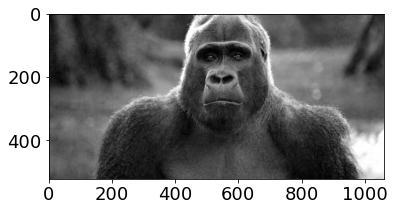

In [138]:
print("Image en niveau de gris : \n")
plt.imshow(img_gray, cmap ="gray")

On a bien un image en niveau de gris, sans faire de gros calcul, seulement en gardant un des trois canaux. C'est une manière simple mais pas si efficace que ça dans certains cas, cela reste un raccourci donc ce n'est pas parfait.

On peut également zoomer sur l'image à l'aide de la fonction gca() qui permet d'accéder aux dimensions des axes du graphique, et axis() qui permet de les modifier. 

L'argument dans axis() est un tableau avec les axes *x* et *y*. On définit un axe des *x* entre 300 et 800, et un axe *y* entre 0 et 370. 

Zoom sur l'image en niveau de gris : 



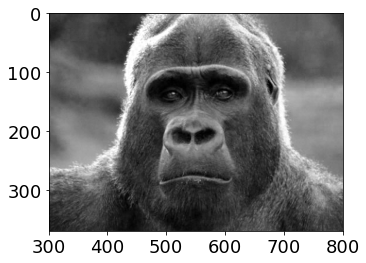

In [139]:
print("Zoom sur l'image en niveau de gris : \n")
plt.gca().axis([300,800,370,0])
plt.imshow(img_gray, cmap = "gray");

## Opérations sur les images avec Numpy

En plus de nous permettre d'obtenir des images en niveau de gris, Numpy peut aussi effectuer des opérations sur les tableaux, donc sur les images comme une rotation à 180° :

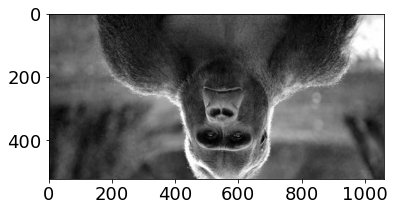

In [140]:
verti = np.flipud(img_gray)
plt.imshow(verti,cmap="gray")

Ou une rotation à 90° :

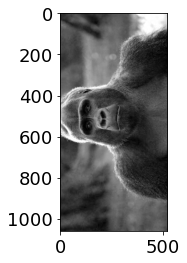

In [141]:
rot = np.rot90(img_gray)
plt.imshow(rot,cmap="gray")

Avec matplotlib, on a redimensionner les axes du graphiques, avec Numpy, on peut redimensionner l'image elle-même :

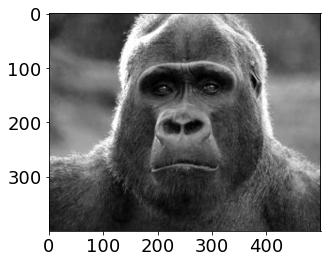

In [142]:
img_reshape = img_gray[:400,300:800,:]
plt.imshow(img_reshape,cmap="gray")

On prend les 400 dernières lignes de l'image, les colonnes entre 300 et 799 et les trois canaux RVB, ce qui effectue un rognage de l'image.


# Masques avec Numpy

## Niveau de gris

On peut appliquer des masques avec Numpy, par exemple, pour transformer une image couleur en niveau de gris :

Image d'origine :

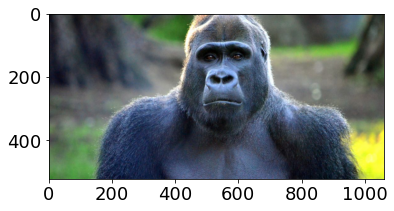

In [143]:
plt.imshow(img)

Une image en niveau de gris est composée non pas de pixel avec 3 canaux, mais avec un seul canal, la luminance. 
Pour obtenir une luminance à partir des 3 canaux RVB, il existe une formule que l'on va appliquer : **Luminance  = 0.2126 * Rouge + 0.7152 * Vert + 0.0722 * Bleu**

Cette formule est enfaite une norme établit par L'Union internationale des télécommunications.


On parcours alors chaque pixel de notre image et on effectue la transformation :

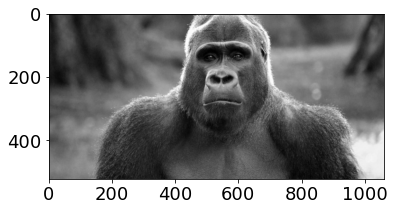

In [144]:
nb_lignes,nb_colonnes,_ = img.shape

image_gray = np.copy(img)
for ligne in range(nb_lignes):
    for col in range(nb_colonnes):
        image_gray[ligne,col] = image_gray[ligne,col][0] * 0.2126 + image_gray[ligne,col][1] * 0.7152 + image_gray[ligne,col][2] * 0.0722      

plt.imshow(image_gray)

## Noir et blanc

Maintenant qu'on a une image en niveau de gris, on peut transformer cette image en noir et blanc.

Une image en noir et blanc est composé uniquement de 1 et 0, valeurs qui correspondent aux Blanc et Noir.

Pour la transformation, on décide d'un seuil, ici 100 (déterminé de manière empirique), et tous les pixels qui ont une valeur supérieur à ce seuil se verra attribué une valeur de 1, 0 sinon. Cette opération en une ligne est possible grâce à la puissance des tableaux Numpy.

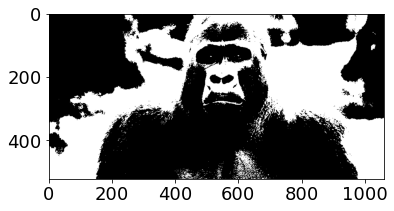

In [145]:
seuil = 100
image_noir_blanc = 1.0*(image_gray > seuil)  
plt.imshow(image_noir_blanc)

## Négatif d'une image

Pour avoir le négatif d'une image, nous devons soustraire 255 aux valeurs de tous les pixels :

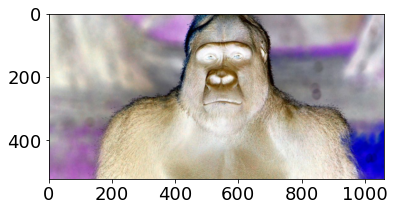

In [146]:
image_neg = np.copy(img)

for ligne in range(nb_lignes):
    for col in range(nb_colonnes):
        for pix in range(3):            
            image_neg[ligne,col,pix] = 255 - image_neg[ligne,col,pix]
        
plt.imshow(image_neg)

# Manipulation d'image avec Pillow


# Pillow

Pillow est une bibliothèque de manipulation d'image en python, il s'agit d'un fork de PIL (Python Imaging Library). Un fork signifie qu'il s'agit de la copie d'un répertoire, ici le répertoire PIL, cela permet de tester des modifications dans le code sans pour autant modifier le projet d'origine. Ainsi Pillow est en quelque sorte le successeur de PIL et est disponible librement selon les termes de la Python Imaging Library license.

La bibliothèque Pillow permet l'ouverture, la manipulation et la sauvegarde d'images et supporte plusieurs format d'images (PNG, JPEG, GIF ...). Pillow fournit des capacité de traitement d'image assez puissante et permet ainsi les manipulations basiques comme avancée des images. Cette bibliothèque contient de nombreux modules et il serait trop long de tous les détailler, ainsi nous allons vous présenter les manipulations d'images les plus utiles pour un utilisateur lambda. 


Un premier point est que la bibliothèque Pillow utilise le principe d'image matricielle.


## Ouverture d'un fichier image

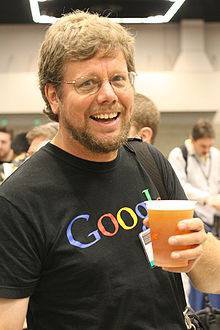

JPEG (220, 330) RGB


In [147]:
from PIL import Image, ImageFilter, ImageFont, ImageDraw, ImageEnhance # Importation de modules Pillow

guido = Image.open("img/guido.jpg") # ouverture d'une image au format jpg

display(guido) # Affichage de l'image 
# Non utilisation de .show()

print(guido.format, guido.size, guido.mode) # Information sur une image


On constate que nous avons une taille

### Bande

Pillow repose également sur le principe de "bande d'image", les images sont composées d'une sucession de bandes. L'exemple classique est la bande RGBA, rouge, vert, bleu et transparent.

Une image peut être constitué d'une ou plusieur bande de données. Une image PNG peut avoir par exemple  les bandes "R" pour rouge, "G" pour vert, "B" pour bleu et "A" pour transparent. Il est possible d'agir sur chaque bande séparémment.

In [148]:
print(guido.getbands())

('R', 'G', 'B')


Nous pouvons voir ici que l'image est constituée de 3 bandes : rouge, vert et bleu.

### Mode

Ensuie Pillow repose également sur le principe de modes, le mode d'une image représentes le types et la profondeur d'un pixel. Un pixel utilise la totalité de la profondeur d'un bit. Par exemple un pixel de 8 bits à une profondeur de 0 - 255 (car 2^8 = 256). La bibliothèque Pillow prend en charge de nombreux modes dont 2 bien connus :

RGB(Pixels 3x8 bits, couleurs vraies) 
RGBA(Pixels 4x8 bits, couleurs vraies avec masque de transparence)

In [149]:
print(guido.mode)

RGB


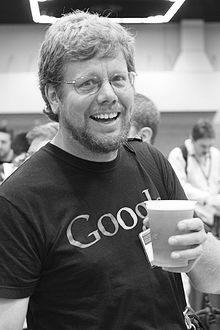

In [150]:
gris = guido.convert("L")
display(gris)

## Manipulations d'images

### Rotation géométrique simple

Nous allons afficher les canaux rouge, vert et bleu de notre image.

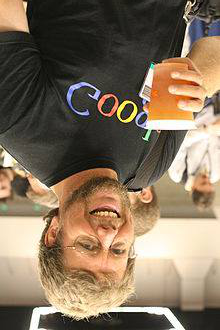

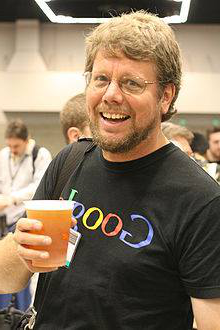

In [151]:
rotation1 = guido.transpose(Image.FLIP_TOP_BOTTOM)
rotation2 = guido.transpose(Image.FLIP_LEFT_RIGHT)
display(rotation1, rotation2)

Pillow permet de directement modifier une image. Nous allons voir comment faire une rotation, un découpage, un floutage d’une zone particulière et un dessin sur l’image grâce à la bibliothèque Pillow.

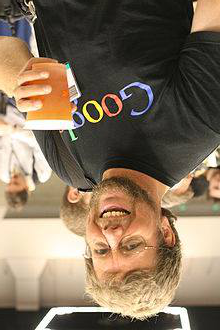

In [152]:
rotation2 = guido.rotate(180)
display(rotation2)

### Découpage

(220, 330)


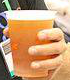

In [153]:
print(guido.size)

recadrer = guido.crop((140, 190, 210, 270))

display(recadrer)

### Floutage d'une zone particulière

1 Image original
2 Découpage de l'image
3 Flouter la partie découper
4 coller l'image découpé dans l'image original

comment trouver facilement les coordonnées dans l'image

Attention à ce que l'image retourne bien à son emplacement initial == reprendre les coordonées de recadrage

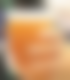

In [154]:
flou = recadrer.filter(ImageFilter.GaussianBlur(5))

display(flou)

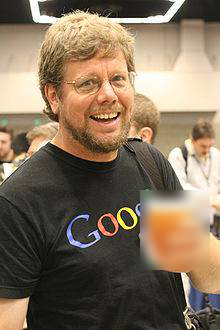

In [155]:
guido.paste(flou, (140, 190, 210, 270))

display(guido)

### Dessin sur une image

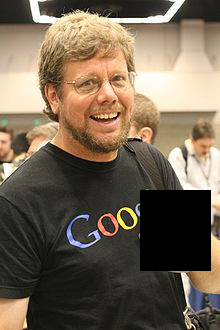

In [156]:
guido = Image.open("img/guido.jpg")

dessin = ImageDraw.Draw(guido)
dessin.rectangle((140, 190, 210, 270), fill="black")

display(guido)

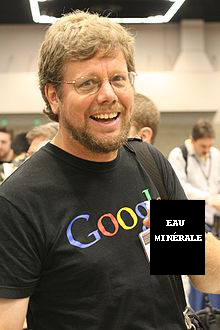

In [157]:
guido = Image.open("img/guido.jpg")
insert = Image.new('RGBA', (55,75), "black")
dessin = ImageDraw.Draw(insert)
dessin.text((5, 17), "  EAU\nMINÉRALE")
guido.paste(insert, (150, 200))

display(guido)

# Manipulation d'image avec scikit-image

Skimage ou Scikit-image, est un package Python open source conçu pour le prétraitement d'image. Nous allons beaucoup utilisé Scikit-image2 qui est une bibliothèque libre comprenant une large collection d'algorithme pour le traitement d'images en Python.

<class 'numpy.ndarray'>


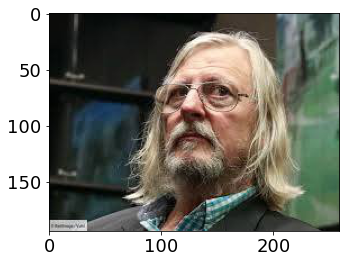

In [158]:
#Insertion image
from skimage import io

didier = io.imread('img/didounet.jpg')
print(type(didier))
plt.imshow(didier);

Premierement on récupère et on insère une image en local de cette façon.

I) Manipulation des canaux d'exposition et de couleur

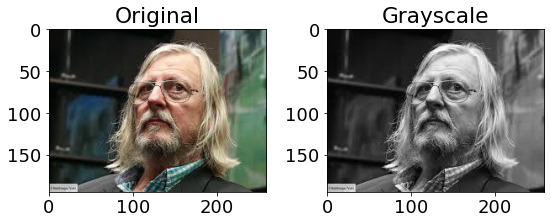

In [159]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

original = didier
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

Cet exemple convertit une image avec des canaux RVB en une image avec un seul canal de niveaux de gris.
La valeur de chaque pixel en niveaux de gris est calculée comme la somme pondérée des pixels rouges, verts et bleus correspondants

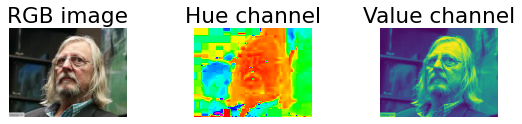

In [160]:
from skimage.color import rgb2hsv


rgb_img = original
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

Ici, on montre comment la conversion RVB en HSV (Teinte, Saturation, Valeur) peut être utilisée pour faciliter les processus de segmentation.

Habituellement, les objets dans les images ont des couleurs (teintes) et des luminosités distinctes, de sorte que ces caractéristiques peuvent être utilisées pour séparer différentes zones de l'image. Dans la représentation RVB, la teinte et la luminosité sont exprimées comme une combinaison linéaire des canaux R, V, B, alors qu'elles correspondent à des canaux uniques de l'image HSV (les canaux Teinte et Valeur). Une simple segmentation de l'image peut alors être effectivement réalisée par un simple seuillage des canaux HSV.

In [ ]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = io.imread('img/covid_19.jpg')
image = io.imread('img/didounet.jpg')

matched = match_histograms(image, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

Cet exemple illustre la fonctionnalité de correspondance d'histogramme. Il manipule les pixels d'une image d'entrée afin que son histogramme corresponde à l'histogramme de l'image de référence. Si les images ont plusieurs canaux, l'appariement est effectué indépendamment pour chaque canal, tant que le nombre de canaux est égal dans l'image d'entrée et la référence.

La correspondance d'histogramme peut être utilisée comme une normalisation légère pour le traitement d'image, telle que la correspondance de caractéristiques, en particulier dans des circonstances où les images ont été prises à partir de différentes sources ou dans des conditions différentes (par exemple, l'éclairage).

In [ ]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters

image = io.imread('img/didounet.jpg')

@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)


@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

Il existe de nombreux filtres conçus pour fonctionner avec des images en niveaux de gris, mais pas avec des images en couleur. Pour simplifier le processus de création de fonctions pouvant s'adapter aux images RVB, scikit-image fournit le décorateur adapt_rgb.

Pour utiliser réellement le décorateur adapt_rgb, vous devez décider comment vous souhaitez adapter l'image RVB pour une utilisation avec le filtre d'échelle de gris. Il existe deux gestionnaires prédéfinis:

each_channel
Passez chacun des canaux RVB au filtre un par un et recousez les résultats dans une image RVB.

hsv_value
Convertissez l'image RVB en HSV et transmettez le canal de valeur au filtre. Le résultat filtré est réinséré dans l'image HSV et reconverti en RVB.

In [ ]:
from skimage.exposure import rescale_intensity

fig, (ax_each, ax_hsv) = plt.subplots(ncols=2, figsize=(14, 7))

ax_each.imshow(rescale_intensity(1 - sobel_each(image)))
ax_each.set_xticks([]), ax_each.set_yticks([])
ax_each.set_title("Filtre Sobel calculé \n sur des canaux RVB individuels")

ax_hsv.imshow(rescale_intensity(1 - sobel_hsv(image)))
ax_hsv.set_xticks([]), ax_hsv.set_yticks([])
ax_hsv.set_title("Filtre Sobel calculé \n sur une image convertie en valeur (HSV)")

Nous pouvons utiliser ces fonctions comme nous les utiliserions normalement, mais elles fonctionnent désormais avec des images en niveaux de gris (image de gauche) et en couleur (image de droite).

In [ ]:
from skimage import color
from skimage import img_as_float

grayscale_image = img_as_float(original[::2, ::2])
image = color.gray2rgb(grayscale_image)

green_multiplier = [0, 1, 0]
cyan_multiplier = [0, 1, 1]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4),
                               sharex=True, sharey=True)
ax1.imshow(green_multiplier * image)
ax2.imshow(cyan_multiplier * image)

Il peut être utile de teinter artificiellement une image avec une certaine couleur, soit pour mettre en évidence des régions particulières d'une image ou peut-être simplement pour animer une image en niveaux de gris. Cet exemple illustre la teinte de l'image en mettant à l'échelle les valeurs RVB et en ajustant les couleurs dans l'espace colorimétrique HSV.

En 2D, les images couleur sont souvent représentées en RVB - 3 couches de tableaux 2D, où les 3 couches représentent les canaux (R) ed, (G) reen et (B) lue de l'image. Le moyen le plus simple d'obtenir une image teintée est de définir chaque canal RVB sur l'image en niveaux de gris mise à l'échelle par un multiplicateur différent pour chaque canal (green_multiplier = [0, 1, 0]). Par exemple, multiplier les canaux rouge et bleu par 0 ne laisse que le canal vert et produit une image verte. De même, la remise à zéro du canal rouge ne laisse que les canaux vert et bleu, qui se combinent pour former du cyan.

II) Transformations géométriques

In [ ]:
#Rajout d'un rectangle jaune

didier[0:194, 100:200, :] = [255, 255, 0]  # [red, green, blue]
plt.imshow(didier);

Ici, on fait apparaître un rectangle jaune pour cacher le visage présent sur l'image.
Le jaune est crée à partir des trois canaux de couleur : dans l’ordre R, V, B (rouge vert bleu).
Ce jaune correspond au triplet (R, V, B) = (255, 255, 0), c'est à dire l'utilisation du rouge et du vert.
"[0:194, 100:200, :]]" correspond aux coordonnées pour la placer ce rectangle.

In [ ]:
#import matplotlib.pyplot as plt
#from skimage import data
from skimage.transform import swirl

swirled = swirl(image, rotation=0, strength=10, radius=120)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

plt.show()

Le tourbillon mage est une déformation d'image non linéaire qui crée un effet tourbillon. Cet exemple décrit l'implémentation de cette transformation dans skimage, ainsi que le mécanisme de déformation sous-jacent.

Déformation d'image :
Lors de l'application d'une transformation géométrique sur une image, nous utilisons généralement un mappage inversé, c'est-à-dire que pour chaque pixel de l'image de sortie, nous calculons sa position correspondante dans l'entrée. La raison en est que, si nous procédons à l'inverse (mappez chaque pixel d'entrée à sa nouvelle position de sortie), certains pixels de la sortie peuvent rester vides. D'autre part, chaque coordonnée de sortie a exactement un emplacement correspondant dans (ou à l'extérieur) de l'image d'entrée, et même si cette position n'est pas un entier, nous pouvons utiliser l'interpolation pour calculer la valeur d'image correspondante.

In [ ]:
from skimage import data
from skimage.transform import pyramid_gaussian


astro = data.astronaut()
rows, cols, dim = astro.shape
pyramid = tuple(pyramid_gaussian(astro, downscale=2, multichannel=True))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()

Dans cet exemple nous utilisons l'image "astrononaut" présente dans la bibiolothèque Scikit-image2.
La fonction pyramid_gaussian prend une image et produit des images successives rétrécies d'un facteur d'échelle constant. Les pyramides d'images sont souvent utilisées, par exemple, pour implémenter des algorithmes de débruitage, de discrimination de texture et de détection invariante d'échelle.

Nota Bene : Il est possible de récupérer des images depuis des bibliothèques comme l'exemple et dessus.
Ci-dessous, on peut voir afficher plusieurs images "scientifiques" :

In [ ]:
matplotlib.rcParams['font.size'] = 18

images = ('hubble_deep_field',
          'immunohistochemistry',
          'microaneurysms',
          'moon',
          'retina',
          'shepp_logan_phantom',
          'cell',
          )


for name in images:
    caller = getattr(data, name)
    image = caller()
    plt.figure()
    plt.title(name)
    plt.imshow(image, cmap=plt.cm.gray)


In [ ]:
from skimage import color, morphology

image = color.rgb2gray(data.hubble_deep_field())[:500, :500]

selem =  morphology.disk(1)
res = morphology.white_tophat(image, selem)

fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(image - res, cmap='gray')

plt.show()

Image récupéré depuis la bibliothèque Scikit-image2.
Cet exemple montre comment supprimer de petits objets d'images en niveaux de gris. La transformation "top hat filter" est une opération qui extrait de petits éléments et des détails d'images données. Ici, nous utilisons une transformée blanche en "top hat filter", qui est définie comme la différence entre l'image d'entrée et son ouverture (morphologie mathématique).

# Détection d'image dans une image

Ici, on utilise un détecteur de visage, entrainé sur un fichier specifique aux visages.
*notion de cascade à définir*

Il existe plusieurs fichiers d'entrainemement pour divers objets comme des motos, ou des cellules afin que le détecteur puisse les reconnaitre sur d'autres images.

(à compléter : description des étapes)

In [ ]:
trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained_file)
img = mpimg.imread("img/biden.jpg")
detected = detector.detect_multi_scale(img=img,scale_factor=1.2,step_ratio=1,min_size=(60, 60),max_size=(123, 123))
plt.imshow(img)
img_desc = plt.gca()

for patch in detected:
    img_desc.add_patch(patches.Rectangle((patch['c'], patch['r']),patch['width'],patch['height'],fill=False,color='g',linewidth=2))

plt.show()

# Conclusion

## Récapitulatif Numpy et Matplotlib

Si on récapitule avec Numpy on a pu :
* Créer une image pixel par pixel pour former un drapeau, celui de la France
* Passer une image couleur en une image en niveau de gris de deux manière différentes
* Manipuler une image en niveau de gris pour effectuer quelques opérations simples comme une rotation ou rognage
* Utilisations de masques pour avoir une image en niveau de gris, noir et blanc, et en négatif

Et avec matplotlib :
* Ouvrir et afficher une image en niveau de gris et en couleur
* Redimensionner les axes du graphique